In [1]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import cv2

from config import Configuration, get_config

CONFIG: Configuration = get_config()

def read_nii_vol(target_filename):
    img = nib.load(target_filename)
    VOL = np.array(img.dataobj)
    return VOL

def save_as_Nifti(VOL, save_Dir, filename):
    VOL_32f = np.array(VOL, dtype=np.float32)
    affine = np.eye(4)
    VOL_nifti_file = nib.Nifti1Image(VOL_32f, affine)
    nib.save(VOL_nifti_file, os.path.join(save_Dir, filename))

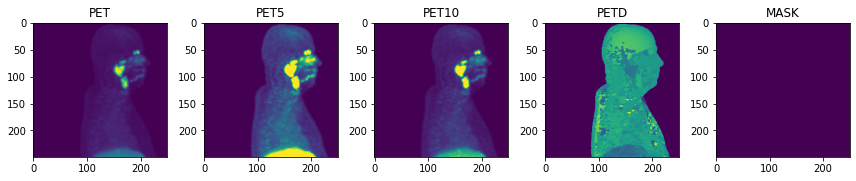

In [4]:
Data_root = CONFIG.data_dir

all_dirs = os.listdir(Data_root)

for sample_dir in ['PSMA-01-001-270-01']:

    name_parts = sample_dir.split("-")
    
    PET_filename = f"{name_parts[0]}-{name_parts[1]}-{name_parts[2]}_PET_{name_parts[3]}-{name_parts[4]}.nii.gz"
    PET5_filename = f"{name_parts[0]}-{name_parts[1]}-{name_parts[2]}_PET5_{name_parts[3]}-{name_parts[4]}.nii.gz"
    PET10_filename = f"{name_parts[0]}-{name_parts[1]}-{name_parts[2]}_PET10_{name_parts[3]}-{name_parts[4]}.nii.gz"
    PETD_filename = f"{name_parts[0]}-{name_parts[1]}-{name_parts[2]}_PETD_{name_parts[3]}-{name_parts[4]}.nii.gz"
    MASK_filename = f"{name_parts[0]}-{name_parts[1]}-{name_parts[2]}_SEG_{name_parts[3]}-{name_parts[4]}.nii.gz"
    
    PET_filename = os.path.join(os.path.join(Data_root, sample_dir),PET_filename)
    PET5_filename = os.path.join(os.path.join(Data_root, sample_dir),PET5_filename)
    PET10_filename = os.path.join(os.path.join(Data_root, sample_dir),PET10_filename)
    PETD_filename = os.path.join(os.path.join(Data_root, sample_dir),PETD_filename)
    MASK_filename = os.path.join(os.path.join(Data_root, sample_dir),MASK_filename)
    
    PET = read_nii_vol(PET_filename)
    PET5 = read_nii_vol(PET5_filename)
    PET10 = read_nii_vol(PET10_filename)
    PETD = read_nii_vol(PETD_filename)
    MASK = read_nii_vol(MASK_filename)
    
    PET = np.float64(PET)
    PET5 = np.float64(PET5)
    PET10 = np.float64(PET10)
    PETD = np.float64(PETD)
    MASK = np.uint8(MASK)
    
    fig, axes = plt.subplots(1, 5, figsize=(12, 6))

    im1 = axes[0].imshow(np.rot90(PET))
    axes[0].set_title('PET')

    im2 = axes[1].imshow(np.rot90(PET5))
    axes[1].set_title('PET5')
    
    im3 = axes[2].imshow(np.rot90(PET10))
    axes[2].set_title('PET10')

    im4 = axes[3].imshow(np.rot90(PETD)) 
    axes[3].set_title('PETD')
    
    im5 = axes[4].imshow(np.rot90(MASK))
    axes[4].set_title('MASK')

    plt.tight_layout()

    plt.show()
    